# Demonstration of the BuTools MAP package

Set the precision and initialize butools (load all packages)

In [1]:
%precision %g
%run "~/github/butools/Python/BuToolsInit.py"

Butools V2.0
Packages loaded: utils, mc, moments, reptrans, trace, ph, dph, map, dmap, fitting, mam, queues
Global variables: 
butools.verbose = False , butools.checkInput = True , butools.checkPrecision = 1e-12


First the global *butools.verbose* flag is set to True to obtain more messages from the functions.

In [2]:
butools.verbose = True

## MAPs and RAPs, MMAPs and MRAPs

RAPs (Rational Arrival Processes) are the generalizations of MAPs without the Markovian restrictions for the rate matrices. Some functions need a MAP, some others a RAP input, which is enforced if the global flag called *butools.checkInput* is set to True, with tolerance given by the global *butools.checkPrecision* variable.

The corresponding functions to check if a matrix pair is a MAP or a RAP are called *CheckMAPRepresentation* and *CheckRAPRepresentation*.

In [3]:
H0 = ml.matrix([[-1., 0, 0],[0, -2., 1.],[0, -1., -2.]])
H1 = ml.matrix([[1., 0, 0],[0, 1., 0],[1., 1., 1.]])

In [4]:
CheckMAPRepresentation(H0, H1)

CheckGenerator: The generator has negative off-diagonal element (precision: 1e-12)!


False

In [5]:
CheckRAPRepresentation(H0, H1)

True

In [6]:
H0 = ml.matrix([[-2., 0, 0],[0, -1., 1.],[0, -1., -1.]])
H1 = ml.matrix([[1., 0, 1.],[0, 1., -1.],[1., 0, 1.]])
CheckRAPRepresentation(H0, H1)

CheckRAPRepresentation: The dominant eigenvalue of D0 is not real!


False

BuTools also supports the multi-type, marked variant of these arrival processes, which are referred to as MMAPs and MRAPs. Instead of a matrix pair, they are characterized by a list of matrices. If the arrival process is able to generate *K* different types of arrivals, *K+1* matrices are necessary to define the process. The list of these *K+1* matrices is the input of the corresponding functions of BuTools.

In [7]:
H0 = ml.matrix([[-5., 0.28, 0.9, 1.],[1., -8., 0.9, 0.1],[0.9, 0.1, -4., 1.],[1., 2., 3., -9.]])
H1 = ml.matrix([[-0.08, 0.7, 0.1, 0.1],[0.1, 1., 1.8, 0.1],[0.1, 0.1, 0.1, 0.7],[0.7, 0.1, 0.1, 0.1]])
H2 = ml.matrix([[0.1, 0.1, 0.1, 1.7],[1.8, 0.1, 1., 0.1],[0.1, 0.1, 0.7, 0.1],[0.1, 1., 0.1, 0.8]])

In [8]:
CheckMMAPRepresentation([H0, H1, H2])

CheckMMAPRepresentation: Some of the matrices H1 ... HM have a negative element!


False

In [9]:
CheckMRAPRepresentation([H0, H1, H2])

True

## Simple functions to compute various properties of MAPs and RAPs

Let us define a simple MAP given by matrices $D_0$ and $D_1$

In [10]:
D0 = ml.matrix ([[-5, 1, 0], [3, -3, 0], [1, 1, -5]])
D1 = ml.matrix ([[0, 0, 4], [0, 0, 0], [1, 1, 1]])

If the AT&T graphviz tool is installed, the *ImageFromMAP* and *ImageFromMMAP* functions are able to visualize the MAPs and MMAPs.

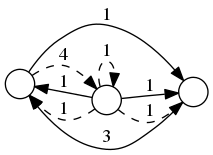

In [11]:
ImageFromMAP(D0, D1)

It is possible to obtain the phase type distributed marginal distribution.

In [12]:
alpha, A = MarginalDistributionFromMAP (D0, D1)
print("alpha = ", alpha)
print("A = ", A)

alpha =  [[ 0.14285714  0.14285714  0.71428571]]
A =  [[-5  1  0]
 [ 3 -3  0]
 [ 1  1 -5]]


From this distribution it is easy to compute the marginal moments by the appropriate functions of the PH package. However, there is a convenience function *MarginalMomentsFromMAP* that does the same.

In [13]:
print(MarginalMomentsFromMAP (D0, D1, 3))
print(MomentsFromPH(alpha, A, 3))

[0.4285714285714286, 0.40000000000000002, 0.58285714285714296]
[0.4285714285714286, 0.40000000000000002, 0.58285714285714296]


Now we compute the autocorrelation function up to lag 10.

In [14]:
LagCorrelationsFromMAP (D0, D1, 10)

array([ -3.01886792e-02,   1.20754717e-02,  -4.83018868e-03,
         1.93207547e-03,  -7.72830189e-04,   3.09132075e-04,
        -1.23652830e-04,   4.94611321e-05,  -1.97844528e-05,
         7.91378113e-06])

The marginal moments and the lag-1 joint moments are known to characterize the MAP uniquely:

In [15]:
m = MarginalMomentsFromMAP (D0, D1)
Nm = LagkJointMomentsFromMAP (D0, D1)
print("marginal moments = ", m)
print("lag-1 joint moments = ", Nm)

marginal moments =  [0.4285714285714286, 0.40000000000000002, 0.58285714285714296, 1.1520000000000004, 2.8662857142857159]
lag-1 joint moments =  [[ 1.          0.42857143  0.4       ]
 [ 0.42857143  0.17714286  0.16228571]
 [ 0.4         0.16228571  0.1472    ]]


## Matching methods

BuTools has several functions for the inverse characterization of MAPs and RAPs. For example, we can obtain a simple 2-state MAP based on 3 moments and the lag-1 autocorrelation. (Note however, that the moments and the autocorrelation must fall into a given interval, othervise *MAP2FromMoments* does not return a valid result)

In [16]:
D0,D1 = MAP2FromMoments([1,3,20], 0.2)
print("D0 = ", D0)
print("D1 = ", D1)
print("Checking moments and correlation:")
moms = MarginalMomentsFromMAP (D0, D1)
ro = LagCorrelationsFromMAP (D0, D1, 1)
print("Moments = ", moms)
print("Lag-1 autocorrelation = ", ro)

D0 =  [[-0.3417355   0.06209041]
 [ 0.         -1.35057219]]
D1 =  [[ 0.27964509  0.        ]
 [ 0.03021729  1.32035491]]
Checking moments and correlation:
Moments =  [0.999999999999998, 2.999999999999984, 19.999999999999851]
Lag-1 autocorrelation =  [ 0.2]


Based on $2N-1$ marginal moments and $N\times N$ lag-1 joint moments we can obtain an order-$N$ RAP as well. First we define a new MAP, and compute its marginal and joint moments...

In [17]:
D0 = ml.matrix ([[-6, 2, 1], [3, -4, 0], [2, 0, -5]])
D1 = ml.matrix ([[0, 1, 2], [0, 0, 1], [1, 1, 1]])
m = MarginalMomentsFromMAP (D0, D1)
Nm = LagkJointMomentsFromRAP (D0, D1)
print("marginal moments = ", m)
print("lag-1 joint moments = ", Nm)

marginal moments =  [0.42857142857142855, 0.38327526132404183, 0.52825698988697201, 0.98482942167740695, 2.311135705693844]
lag-1 joint moments =  [[ 1.          0.42857143  0.38327526]
 [ 0.42857143  0.1820345   0.16181674]
 [ 0.38327526  0.16198671  0.14352756]]


... and solve the inverse characterization problem.

In [18]:
H0, H1 = RAPFromMoments (m, Nm)
print("H0 = ", H0)
print("H1 = ", H1)

H0 =  [[ -3.06944444  22.81703515 -22.36663832]
 [ -1.06307165  -5.8404154    4.5345846 ]
 [ -0.49248391   4.28485984  -6.09014016]]
H1 =  [[ 0.06944444  2.78092404 -0.23132086]
 [ 0.81408791  0.46490727  1.08990727]
 [ 0.74146765  1.09064829  0.46564829]]


We can check if the moments are really the same:

In [19]:
m = MarginalMomentsFromRAP (H0, H1)
Nm = LagkJointMomentsFromRAP (H0, H1)
print("marginal moments = ", m)
print("lag-1 joint moments = ", Nm)

marginal moments =  [0.42857142857142866, 0.3832752613240421, 0.52825698988697256, 0.98482942167740828, 2.311135705693848]
lag-1 joint moments =  [[ 1.          0.42857143  0.38327526]
 [ 0.42857143  0.1820345   0.16181674]
 [ 0.38327526  0.16198671  0.14352756]]


It is easy to see that $(H_0,H_1)$ is a non-Markovian representation. However, it is not at all easy to check if it is a valid process (with non-negative joint densities), or not. Something like *MonocyclicPHFromME* for RAPs is not available yet.

## Representation transformation methods

Now we try to transform $(H_0,H_1)$ into a Markovian representation. 

In [20]:
D0, D1 = MAPFromRAP (H0, H1)
print("D0=", D0)
print("D1=", D1)

D0= [[-5.36050875  1.8098798   0.19876097]
 [ 1.0793193  -7.12929544  1.68636471]
 [ 0.04875948  0.95197382 -2.51019581]]
D1= [[ 0.28136405  0.74482106  2.32568287]
 [ 1.57362442  0.08452984  2.70545717]
 [ 0.74915196  0.12620444  0.63410611]]


Altough we managed to find a Markovian representation, keep in mind that it is not always possible.

If a MAP or a RAP is redundant, we have functions to obtain the minimal representation as well. The next $(D_0,D_1)$ matrices define a redundant MAP.

In [21]:
D0 = ml.matrix ([[-5, 1, 0], [3, -3, 0], [1, 1, -5]])
D1 = ml.matrix ([[0, 0, 4], [0, 0, 0], [1, 1, 1]])

Let us compute the minimal representation:

In [22]:
H0, H1 = MinimalRepFromRAP(D0, D1)
print("H0=", H0)
print("H1=", H1)

H0= [[-4.40740741  1.69312169]
 [ 0.84259259 -2.59259259]]
H1= [[ 2.03703704  0.67724868]
 [ 2.78703704 -1.03703704]]


Thus it is an order-2 rational arrival process. We can check that $(D_0,D_1)$ and $(H_0,H_1)$ are equal indeed by comparing their moments.

In [23]:
m = MarginalMomentsFromMAP (D0, D1)
N = LagkJointMomentsFromMAP (D0, D1, 2)
print("marginal moments = ", m)
print("lag-1 joint moments = ", N)
m = MarginalMomentsFromRAP (H0, H1)
N = LagkJointMomentsFromRAP (H0, H1, 2)
print("marginal moments = ", m)
print("lag-1 joint moments = ", N)

marginal moments =  [0.4285714285714286, 0.40000000000000002, 0.58285714285714296, 1.1520000000000004, 2.8662857142857159]
lag-1 joint moments =  [[ 1.          0.42857143  0.4       ]
 [ 0.42857143  0.17714286  0.16228571]
 [ 0.4         0.16228571  0.1472    ]]
marginal moments =  [0.42857142857142855, 0.40000000000000002, 0.58285714285714285]
lag-1 joint moments =  [[ 1.          0.42857143  0.4       ]
 [ 0.42857143  0.17714286  0.16228571]
 [ 0.4         0.16228571  0.1472    ]]


...or, by finding an appropriate similarity transformation matrix (with the *SimilarityMatrix* function of the *RepTrans* package) that transforms $(D_0,D_1)$ to $(H_0,H_1)$.

In [24]:
T = SimilarityMatrix(H0,D0)

Check if matrix $T$  transforms $(D_0,D_1)$ to $(H_0,H_1)$ indeed:

In [25]:
la.norm (T*D0*T.I - H0), la.norm (T*D1*T.I - H1)

(1.1065e-14, 7.36773e-15)

Most MAP/RAP related functions in butools work with marked processes as well. Let us try out the representation minimization method with the following MMAP.

In [26]:
D0 = ml.matrix ([[-6, 0, 0], [0, -5, 2], [0, 0, -3]])
D1 = ml.matrix ([[0, 1, 5], [1, 1, 0], [1, 0, 1]])
D2 = ml.matrix ([[0, 0, 0], [0, 1, 0], [0, 0, 1]])
H0, H1, H2 = MinimalRepFromMRAP ([D0, D1, D2])
print("H0=", H0)
print("H1=", H1)
print("H2=", H2)

H0= [[-2.58578644 -1.41421356]
 [ 1.         -6.41421356]]
H1= [[ 4.27614237 -0.94280904]
 [ 8.49509379 -3.27614237]]
H2= [[ 1.13807119 -0.47140452]
 [ 0.33333333 -0.13807119]]


Thus it is an order-2 representation again. To confirm it, we compare the marginal and the lag-1 joint moments.

In [27]:
m = MarginalMomentsFromMMAP ([D0, D1, D2], 5)
N = LagkJointMomentsFromMMAP ([D0, D1, D2], 2)
print("marginal moments = ", m)
print("lag-1 joint moments = ", N)
m = MarginalMomentsFromMRAP ([H0, H1, H2], 5)
N = LagkJointMomentsFromMRAP ([H0, H1, H2], 2)
print("marginal moments = ", m)
print("lag-1 joint moments = ", N)

marginal moments =  [0.29166666666666663, 0.18055555555555558, 0.1736111111111111, 0.22685185185185186, 0.37422839506172839]
lag-1 joint moments =  [matrix([[ 0.75      ,  0.20833333,  0.125     ],
        [ 0.20833333,  0.05555556,  0.03240741],
        [ 0.125     ,  0.03240741,  0.01851852]]), matrix([[ 0.25      ,  0.08333333,  0.05555556],
        [ 0.08333333,  0.02777778,  0.01851852],
        [ 0.05555556,  0.01851852,  0.01234568]])]
marginal moments =  [0.29166666666666652, 0.18055555555555547, 0.17361111111111099, 0.22685185185185169, 0.374228395061728]
lag-1 joint moments =  [matrix([[ 0.75      ,  0.20833333,  0.125     ],
        [ 0.20833333,  0.05555556,  0.03240741],
        [ 0.125     ,  0.03240741,  0.01851852]]), matrix([[ 0.25      ,  0.08333333,  0.05555556],
        [ 0.08333333,  0.02777778,  0.01851852],
        [ 0.05555556,  0.01851852,  0.01234568]])]


The tool called **RAPFromMomentsAndCorrelations** does what its name suggests. The input is a set of moments and lag-k correlations, and the output is a RAP.

For testing purposes we feed it with the moments and correlations of an other RAP, $(H_0,H_1)$:

In [28]:
H0 = ml.matrix([[-6.2, 2., 0],[2., -9., 1.],[1., 0, -3.]])
H1 = ml.matrix([[2.2, 0, 2.],[0, 4., 2.],[0, 1., 1.]])
mom = MarginalMomentsFromRAP(H0, H1)
corr = LagCorrelationsFromRAP(H0, H1, 3)
G0, G1 = RAPFromMomentsAndCorrelations(mom, corr)
print("G0=",G0)
print("G1=",G1)

G0= [[ -8.96289388  22.25257011 -18.54409809]
 [ -0.99178156  -4.66699225   2.33103341]
 [ -1.2472989    2.42791179  -4.57011387]]
G1= [[ 2.20274746 -1.3172514   4.36892581]
 [ 1.2179263   1.82172664  0.28808746]
 [ 1.02115416  0.41735382  1.950993  ]]


The next code shows that the procedure was successfull.

In [29]:
rmom = MarginalMomentsFromRAP(G0, G1)
rcorr = LagCorrelationsFromRAP(G0, G1, 3)
print("mom=",mom)
print("rmom=",rmom)
print("corr=",corr)
print("rcorr=",rcorr)

mom= [0.29774127310061604, 0.19283643304803644, 0.19448147792730755, 0.26597325539245531, 0.45833053059627116]
rmom= [0.29774127310061604, 0.19283643304803638, 0.19448147792730741, 0.26597325539245492, 0.45833053059627044]
corr= [ 0.01239357  0.0027412   0.00072384]
rcorr= [ 0.01239357  0.0027412   0.00072384]


However, the we did not get back the original RAP! Let us find the similarity matrix that transforms $H_0$ to $G_0$:

In [30]:
T = SimilarityMatrix (H0, G0)

This matrix does the job: transforms $H_0$ to $G_0$:

In [31]:
T.I*H0*T - G0

matrix([[ -8.02913291e-12,  -1.76925141e-12,  -1.78346227e-12],
        [ -1.52489132e-12,  -4.89386309e-13,  -3.93463040e-13],
        [ -1.73239201e-12,  -4.48974191e-13,  -4.06785716e-13]])

...but the same similarity transformation does not transform $H_1$ to $G_1$!

In [32]:
T.I*H1*T - G1

matrix([[ 0.95226605, -8.83362948,  7.88136343],
        [-0.16334624,  0.21780655, -0.05446031],
        [ 0.16334624, -0.21780655,  0.05446031]])

The last inverse characterization too is **MAPFromFewMomentsAndCorrelations**. Contrary to all previous procedures, this one always gives a valid MAP representation based on 2 or 3 moments and the lag-1 autocorrelation.

In [33]:
D0, D1 = MAPFromFewMomentsAndCorrelations([1.2, 4.32, 20.], -0.4)
print("D0=",D0)
print("D1=",D1)

D0= [[ -0.33604187   0.33604187   0.           0.           0.           0.        ]
 [  0.         -36.02667283   0.           0.           0.           0.        ]
 [  0.           0.          -1.28286281   1.28286281   0.           0.        ]
 [  0.           0.           0.          -1.28286281   1.28286281   0.        ]
 [  0.           0.           0.           0.          -1.28286281
    1.28286281]
 [  0.           0.           0.           0.           0.          -1.37471852]]
D1= [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.47407456e-02   1.77659290e+00   2.34745531e+01   0.00000000e+00
    0.00000000e+00   1.07507861e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0

The result is sometimes large, but at least Markovian. Let us check the target parameters.

In [34]:
rmoms = MarginalMomentsFromMAP(D0, D1, 3)
rcorr1 = LagCorrelationsFromMAP(D0, D1, 1)
print("rmoms=",rmoms)
print("rcorr1=",rcorr1)

rmoms= [1.2000000000000002, 4.3200000000000021, 19.999999999999915]
rcorr1= [-0.4]


## Randomness

The **RandomMAP** and **RandomMMAP** procedures provide a random MAP and MMAP, respectively.The input parameters are the number of phases, the number of arrival types (in case of MMAP), the mean inter-arrival time and the number of zero entries.

In [35]:
D0, D1 = RandomMAP(4, 1.62, 10)
print("D0=",D0)
print("D1=",D1)

D0= [[-2.58668134  0.23931909  0.          0.63351354]
 [ 0.         -1.75671785  0.09718683  0.01550621]
 [ 0.04462193  0.80081749 -1.5411998   0.        ]
 [ 0.          0.          0.         -0.40711131]]
D1= [[ 0.13948285  0.14126085  0.6699959   0.76310911]
 [ 0.29832463  0.44959652  0.79414025  0.10196341]
 [ 0.          0.07989564  0.          0.61586473]
 [ 0.          0.          0.19373849  0.21337281]]


In [36]:
D0, D1, D2, D3 = RandomMMAP(4, 3, 1.62, 10)
print("D0=",D0)
print("D1=",D1)
print("D2=",D2)
print("D3=",D3)

D0= [[-0.82684732  0.10509885  0.01955105  0.        ]
 [ 0.0665087  -1.04377322  0.02035592  0.05023649]
 [ 0.066475    0.03017514 -0.53943718  0.02570979]
 [ 0.07044526  0.0906659   0.0396139  -0.74180676]]
D1= [[ 0.0676032   0.03704518  0.04165858  0.04829198]
 [ 0.10830712  0.11452429  0.11203451  0.04137123]
 [ 0.08150456  0.          0.03539041  0.04125597]
 [ 0.00866007  0.10553133  0.          0.03193119]]
D2= [[ 0.09247225  0.12156338  0.05404064  0.0231576 ]
 [ 0.09804396  0.06668159  0.09061084  0.01751566]
 [ 0.02552027  0.08998726  0.03548746  0.        ]
 [ 0.10850257  0.09873466  0.07408211  0.        ]]
D3= [[ 0.02775122  0.00348846  0.11137723  0.0737477 ]
 [ 0.07607181  0.12185031  0.05966079  0.        ]
 [ 0.          0.          0.07814517  0.02978613]
 [ 0.          0.          0.02466867  0.0889711 ]]


The **SamplesFromMAP** / **SamplesFromMMAP** functions return a vector of random samples from the given arrival processes. These samples can be used in simulations, for instance.

In [37]:
D0,D1 = MAP2FromMoments([1,3,20], 0.2)
x = SamplesFromMAP(D0, D1, 100000)
print("mean=",np.mean(x))

mean= 1.0071132382


In the MMAP case the result is two dimensional, the output is the list of sample-type pairs.

In [38]:
D = RandomMMAP(4, 3, 1.62, 10)
x = SamplesFromMMAP(D, 10000)
print(x[0:10])

[[ 3.16164714  1.        ]
 [ 0.37266944  3.        ]
 [ 1.41439525  2.        ]
 [ 0.830808    3.        ]
 [ 0.00969904  1.        ]
 [ 0.21160724  2.        ]
 [ 2.96377196  1.        ]
 [ 3.04674254  2.        ]
 [ 2.57087294  1.        ]
 [ 2.29580264  2.        ]]
